In [1]:
# Read the dataset
import pandas as pd
df = pd.read_csv('TRD_Co.csv')
df

,Stkcd,Stknme,Listdt,Markettype
0,1,平安银行,1991-04-03,4
1,2,万科A,1991-01-29,4
2,3,PT 金田A,1991-07-03,4
3,4,国华网安,1991-01-14,4
4,5,ST 星源,1990-12-10,4
...,...,...,...,...
4996,900952,锦港B股,1998-05-19,2
4997,900953,凯马B,1998-06-24,2
4998,900955,*ST 海创B,1999-01-18,2
4999,900956,东贝B股,1999-07-15,2


In [2]:
# Check the duplicate listed firms
df1 = df.groupby(['Stknme','Markettype']).size()
col = df1[df1>1].reset_index()[['Stknme','Markettype']]
pd.merge(col,df,on=['Stknme','Markettype'])

,Stknme,Markettype,Stkcd,Listdt
0,东方明珠,1,600637,1993-03-16
1,东方明珠,1,600832,1994-02-24
2,百联股份,1,600631,1993-02-19
3,百联股份,1,600827,1994-02-04


In [3]:
### Since 600832 and 600631 have been delisting, here we drop these two firms
df.drop(index=(df.loc[(df['Stkcd']==600832)].index), inplace=True)
df.drop(index=(df.loc[(df['Stkcd']==600631)].index), inplace=True)

### This problem only focuses on A-shares in China stock markets, here we drop B-shares data
df.drop(index=(df.loc[(df['Markettype']==2)].index), inplace=True)
df.drop(index=(df.loc[(df['Markettype']==8)].index), inplace=True)
df.drop(index=(df.loc[(df['Markettype']==32)].index), inplace=True)

In [4]:
# Retrieve the listed year
df['Listyear'] = None

df['Listyear'] = df['Listdt'].apply(lambda x: x.split('-')[0])
df

,Stkcd,Stknme,Listdt,Markettype,Listyear
0,1,平安银行,1991-04-03,4,1991
1,2,万科A,1991-01-29,4,1991
2,3,PT 金田A,1991-07-03,4,1991
3,4,国华网安,1991-01-14,4,1991
4,5,ST 星源,1990-12-10,4,1990
...,...,...,...,...,...
4941,871553,凯腾精工,2021-08-06,64,2021
4942,871642,通易航天,2021-08-16,64,2021
4943,871857,泓禧科技,2022-02-28,64,2022
4944,871981,晶赛科技,2021-11-15,64,2021


<AxesSubplot:xlabel='Listyear'>

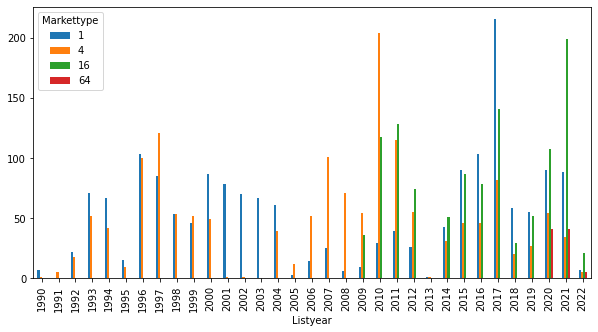

In [5]:
table_count = df.groupby(['Listyear', 'Markettype'])['Stkcd'].agg('count').unstack()
table_count.plot.bar(figsize=(10,5))